In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib as plt
import pandas_ta as ta

In [2]:
data = yf.download(tickers="AAPL")
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099192,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094017,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087116,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089273,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091861,73449600
...,...,...,...,...,...,...
2024-03-11,172.940002,174.380005,172.050003,172.750000,172.750000,60139500
2024-03-12,173.149994,174.029999,171.009995,173.229996,173.229996,59825400
2024-03-13,172.770004,173.190002,170.759995,171.130005,171.130005,52488700


In [6]:
import matplotlib.pyplot as plt

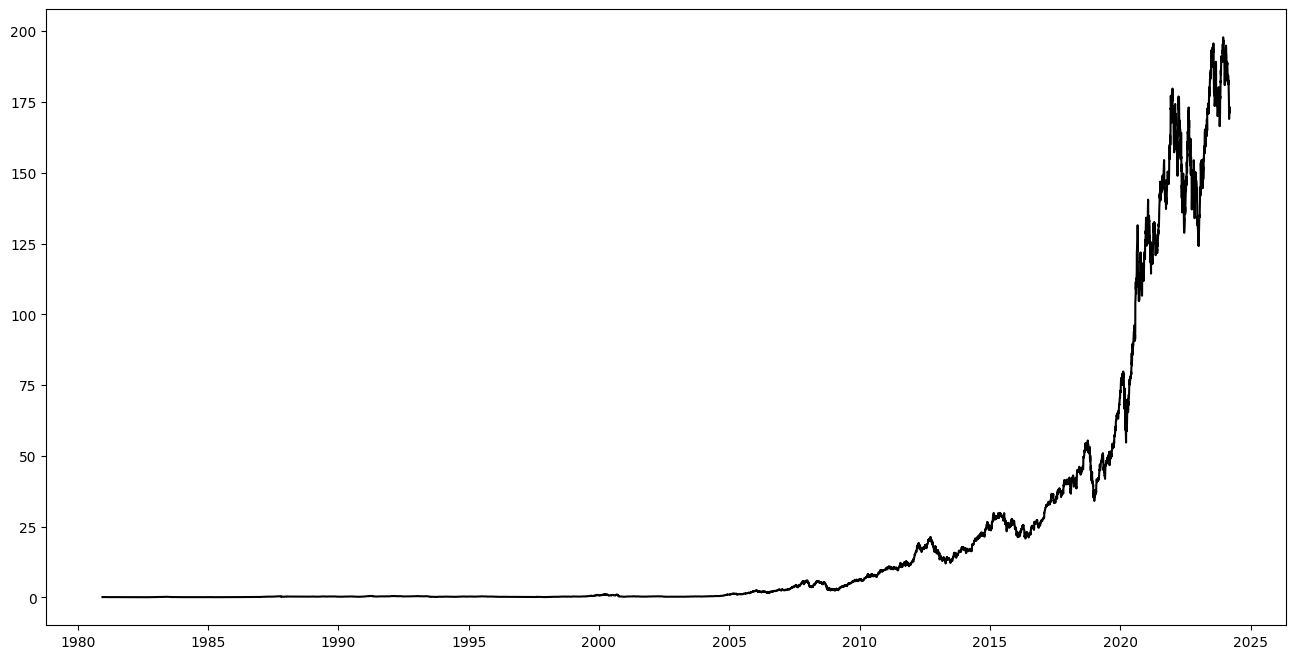

In [7]:
plt.figure(figsize=(16,8))
plt.plot(data["Adj Close"], color = "black", label = "Price")

In [8]:
#calculate the relative strength index
data["RSI"] = ta.rsi(data.Close, length=15)

In [11]:
#find estimated moving average, (slow, medium, and fast)
data["EMAF"] = ta.ema(data.Close, length=20)
data["EMAM"] = ta.ema(data.Close, length=100)
data["EMAS"] = ta.ema(data.Close, length=150)
data[["EMAF", "EMAM", "EMAS"]].skew()
data[["EMAF", "EMAM", "EMAS"]].describe()

,EMAF,EMAM,EMAS
count,10886.000000,10806.000000,10756.000000
mean,20.732590,20.203107,19.878947
std,43.115599,41.947627,41.223771
min,0.055609,0.063850,0.068316
25%,0.299337,0.307381,0.310710
50%,0.515704,0.501133,0.493554
75%,19.199779,18.857489,18.616025
max,193.330404,186.150841,183.424804


In [14]:
#create a new column, 'target'
""" 
    Subtract the Closing Price, with its' corresponding opening price, to see if
    assets have been either, gained or earned all throughout the day.
"""
data["Target"] = data["Adj Close"] - data.Open
data['Target'] = data['Target'].shift(-1)


,Open,High,Low,Close,Adj Close,Volume,RSI,EMAF,EMAM,EMAS,Target
Date,,,,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099192,469033600,NaN,NaN,NaN,NaN,-0.028193
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094017,175884800,NaN,NaN,NaN,NaN,-0.026165
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087116,105728000,NaN,NaN,NaN,NaN,-0.026240
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089273,86441600,NaN,NaN,NaN,NaN,-0.027001
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091861,73449600,NaN,NaN,NaN,NaN,-0.028649
...,...,...,...,...,...,...,...,...,...,...,...
2024-03-11,172.940002,174.380005,172.050003,172.750000,172.750000,60139500,34.204301,178.074067,183.679801,182.296884,0.080002
2024-03-12,173.149994,174.029999,171.009995,173.229996,173.229996,59825400,35.516166,177.612727,183.472875,182.176793,-1.639999
2024-03-13,172.770004,173.190002,170.759995,171.130005,171.130005,52488700,32.480477,176.995325,183.228461,182.030478,0.089996


In [19]:
data['TargetClass'] = [1 if data.Target[i] > 0 else 0 for i in range(len(data))]
data['TargetNextClose'] = data['Adj Close'].shift(-1)
data

/var/folders/g4/ykwfgyl55t7dfzv_zc3dcshh0000gn/T/ipykernel_1484/1288010206.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data['TargetClass'] = [1 if data.Target[i] > 0 else 0 for i in range(len(data))]


,Open,High,Low,Close,Adj Close,Volume,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose
Date,,,,,,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099192,469033600,NaN,NaN,NaN,NaN,-0.028193,0,0.094017
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094017,175884800,NaN,NaN,NaN,NaN,-0.026165,0,0.087116
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087116,105728000,NaN,NaN,NaN,NaN,-0.026240,0,0.089273
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089273,86441600,NaN,NaN,NaN,NaN,-0.027001,0,0.091861
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091861,73449600,NaN,NaN,NaN,NaN,-0.028649,0,0.097467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-11,172.940002,174.380005,172.050003,172.750000,172.750000,60139500,34.204301,178.074067,183.679801,182.296884,0.080002,1,173.229996
2024-03-12,173.149994,174.029999,171.009995,173.229996,173.229996,59825400,35.516166,177.612727,183.472875,182.176793,-1.639999,0,171.130005
2024-03-13,172.770004,173.190002,170.759995,171.130005,171.130005,52488700,32.480477,176.995325,183.228461,182.030478,0.089996,1,173.000000


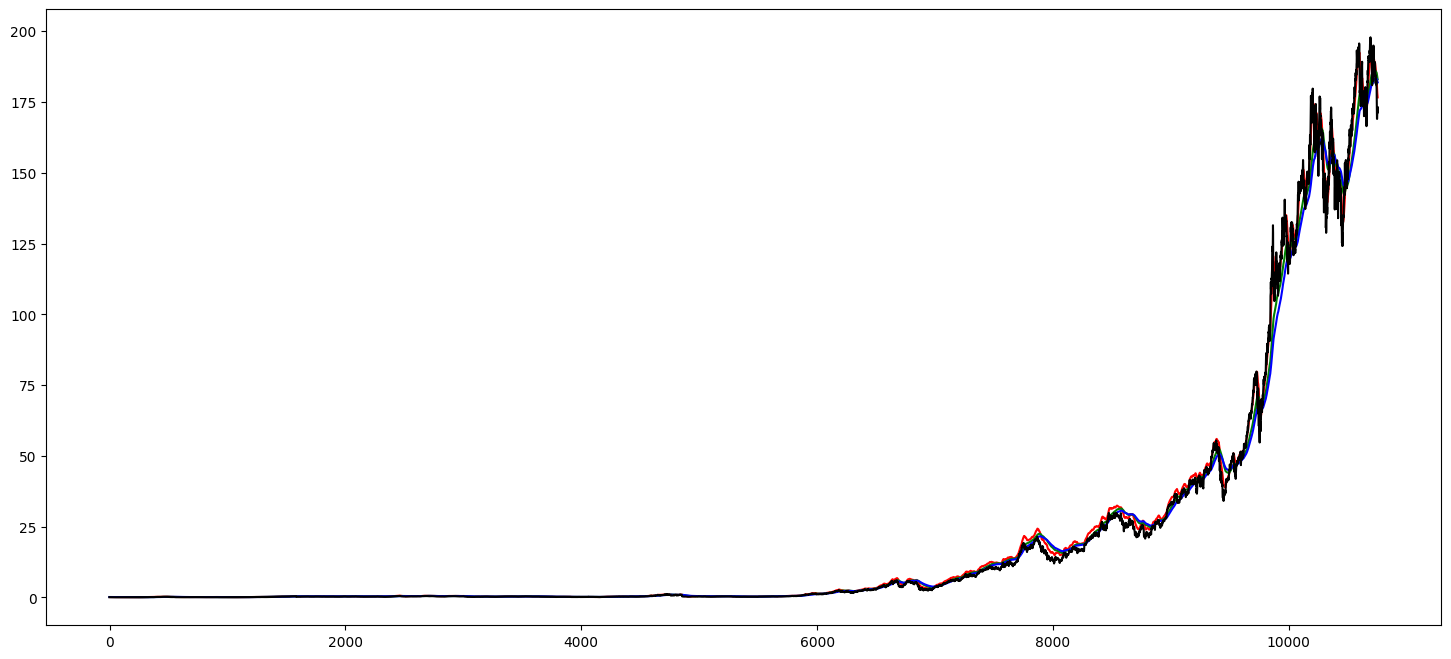

In [20]:
data.dropna(inplace=True)
data.reset_index(inplace=True)
plt.figure(figsize=(18,8))
plt.plot(data["EMAF"], color = 'red', label = 'Price')
plt.plot(data["EMAM"], color = 'green', label = 'Price')
plt.plot(data["EMAS"], color = 'blue', label = 'Price')
plt.plot(data["Adj Close"], color = 'black', label='Price')